Problem 1

In [1]:
# Sim constants

Years = 20
Steps = Years * 365

# Measles properties
beta = 0.01
gamma = 0.1
alpha = 0.005


## Subproblem c

In [2]:
# Make markov chain vector


run_20_years <- function(Steps) {

chain = integer(Steps)


    # Simulate over 20 years
    for (i in 2:length(chain)) {
        # Generate random variable
        s = runif(1,0,1)
    
        # If in state 0
        if(chain[i-1] == 0) {
            if(s >= beta){
                chain[i] = 1
                }
            else {
                chain[i] = 0
            }
        }
    
        # If in state 1
        if(chain[i-1] == 1) {
            if(s >= gamma){
                chain[i] = 2
                }
            else {
                chain[i] = 1
            }
        }
        
        # If in state 2
        if(chain[i-1] == 2) {
            if(s >= alpha){
                chain[i] = 0
                }
            else {
                chain[i] = 2
            }
        }
    }
    return(chain)
}

chain = run_20_years(Steps)

# Count number of days in states
days_of_state_0 <- sum(chain == 0)
days_of_state_1 <- sum(chain == 1)
days_of_state_2 <- sum(chain == 2)

print("Days in state 0: ")
print(days_of_state_0)
print("Days in state 1: ")
print(days_of_state_1)
print("Days in state 2: ")
print(days_of_state_2)

print("total")
print(days_of_state_0 + days_of_state_1 + days_of_state_2)

[1] "Days in state 0: "
[1] 2367
[1] "Days in state 1: "
[1] 2583
[1] "Days in state 2: "
[1] 2350
[1] "total"
[1] 7300


In [3]:
# Compute mean days spent in each state from the last 10 years

find_mean_days <- function(chain) {

mean_time_0 = sum(chain[3651:Steps] == 0) / 10
mean_time_1 = sum(chain[3651:Steps] == 1) / 10
mean_time_2 = sum(chain[3651:Steps] == 2) / 10
print("mean days used in state S: ")
print(mean_time_0)
print("mean days used in state I: ")
print(mean_time_1)
print("mean days used in state R: ")
print(mean_time_2)
    return(mean_time_0,mean_time_1,mean_time2)
}


In [15]:
n = 7300


confidence_intervals <- function(steps, samples){

    days_of_state_0 <- c(); days_of_state_1 <- c(); days_of_state_2 <- c()

    for (i in 1:samples){
        chain <- run_20_years(steps)
        last_10_years <- chain[(steps/2 + 1):steps]
        days_of_state_0 <- c(days_of_state_0, sum(last_10_years==0))
        days_of_state_1 <- c(days_of_state_1, sum(last_10_years==1))
        days_of_state_2 <- c(days_of_state_2, sum(last_10_years==2))
    }

    # Calculate 95% confidence intervals
    confidence_interval_0 <- t.test(days_of_state_0)$conf.int
    confidence_interval_1 <- t.test(days_of_state_1)$conf.int
    confidence_interval_2 <- t.test(days_of_state_2)$conf.int

    return(c(confidence_interval_0, confidence_interval_1, confidence_interval_2))
}

conf_ints <- confidence_intervals(n, 30)
print("95% confidence intervals for days in states 0, 1, and 2:")
for (i in seq(1, length(conf_ints), 2)){
    print(paste("State", (i-1)/2, ":", round(conf_ints[i], 3), "to", round(conf_ints[i+1], 3)))
}





[1] "95% confidence intervals for days in states 0, 1, and 2:"
[1] "State 0 : 1176.425 to 1179.041"
[1] "State 1 : 1297.814 to 1302.386"
[1] "State 2 : 1170.657 to 1173.677"


## Subproblem e

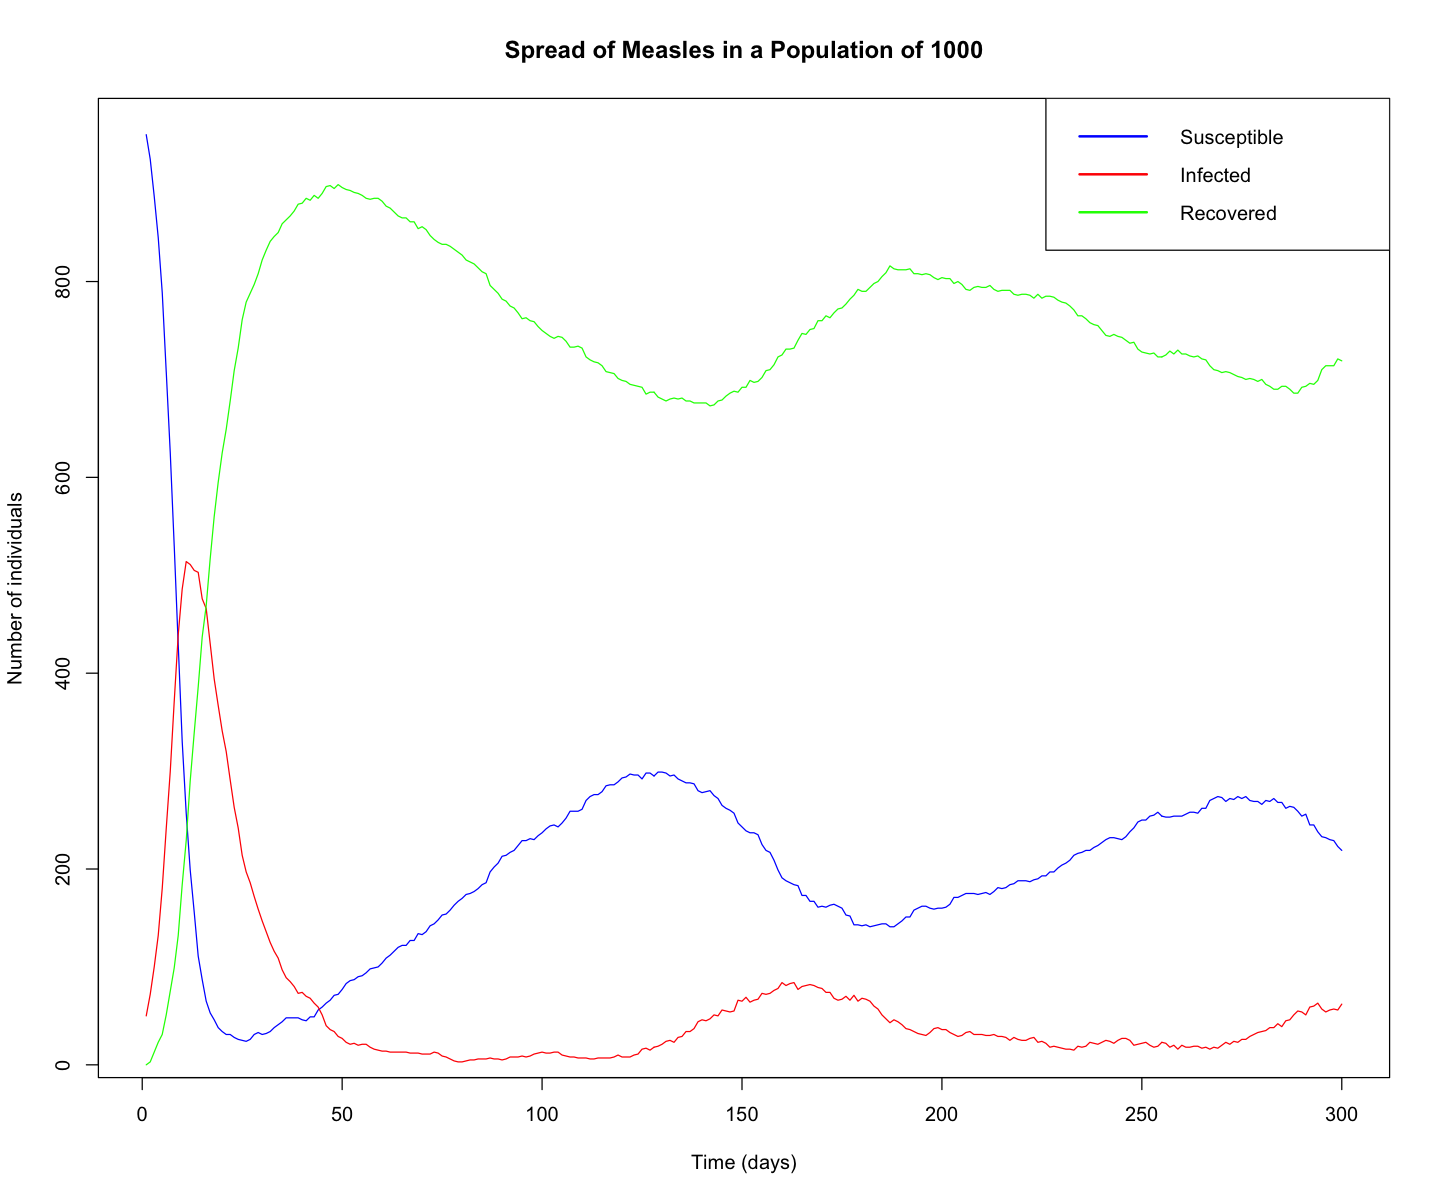

In [9]:
N <- 1000
steps <- 300
Y0 <- c(950, 50, 0)

beta_n <- function(infected, N) 0.5 * infected / N
    


spread_of_measles <- function(Y0, n){
    S <- integer(n); I <- integer(n); R <- integer(n)
    S[1] <- Y0[1]; I[1] <- Y0[2]; R[1] <- Y0[3]

    for (i in 2:n){
        Sprev <- S[i-1]; Iprev <- I[i-1]; Rprev <- R[i-1]
        beta <- beta_n(Iprev, N)

        Inew <- rbinom(n = 1, p = beta, size = Sprev)
        Istay <- rbinom(n = 1, p = 1 - gamma, size = Iprev)
        Rstay <- rbinom(n = 1, p = 1 - alpha, size = Rprev)

        S[i] <- Sprev - Inew + (Rprev - Rstay)
        I[i] <- Inew + Istay
        R[i] <- Rstay + (Iprev - Istay)
    }

    return (list(S, I, R))
}

measle_spread <- spread_of_measles(Y0, steps)


par(bg="white")
options(repr.plot.width = 12, repr.plot.height = 10)
plot(1:steps, measle_spread[[1]], type='l', col='blue', xlab='Time (days)', ylab='Number of individuals', main='Spread of Measles in a Population of 1000')
lines(1:steps, measle_spread[[2]], type='l', col='red')
lines(1:steps, measle_spread[[3]], type='l', col='green')
legend("topright", legend=c("Susceptible", "Infected", "Recovered"), col=c("blue", "red", "green"), lty=1, lwd=2)


